In [47]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [49]:
cholera_query = "SELECT * FROM cholera"

In [50]:
cholera_df = pd.read_sql(cholera_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_2952\1059573627.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cholera_df = pd.read_sql(cholera_query, conn)


In [51]:
cholera_df = cholera_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [52]:
cholera_df.head()

,id,Gender,Diarrhea,Dehydration,Abdominal_Cramps,Irritability,Restlessness,Lethargy,Vomiting,Severity
0,1,1,1,1,2,2,1,1,2,1
1,2,1,2,1,2,1,2,2,1,2
2,3,1,1,2,2,2,1,1,1,1
3,4,2,1,2,2,1,2,1,1,1
4,5,2,1,2,2,2,2,1,2,3


In [53]:
correlation_matrix = cholera_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        id    Gender  Diarrhea  Dehydration  Abdominal_Cramps  \
id                1.000000  0.009330 -0.009346    -0.003810          0.002514   
Gender            0.009330  1.000000 -0.015595    -0.007995         -0.023997   
Diarrhea         -0.009346 -0.015595  1.000000     0.015207          0.020172   
Dehydration      -0.003810 -0.007995  0.015207     1.000000         -0.003344   
Abdominal_Cramps  0.002514 -0.023997  0.020172    -0.003344          1.000000   
Irritability      0.003744 -0.013998  0.007080    -0.005276          0.001156   
Restlessness     -0.015354 -0.007604 -0.008578    -0.009864         -0.009920   
Lethargy          0.001836 -0.008805 -0.009727    -0.019035          0.006500   
Vomiting          0.013426 -0.025599  0.001294     0.021180          0.000546   
Severity          0.015398 -0.024661  0.111821     0.113613          0.126330   

                  Irritability  Restlessness  Lethargy  Vomiting  Severity  
id                    0.003744 

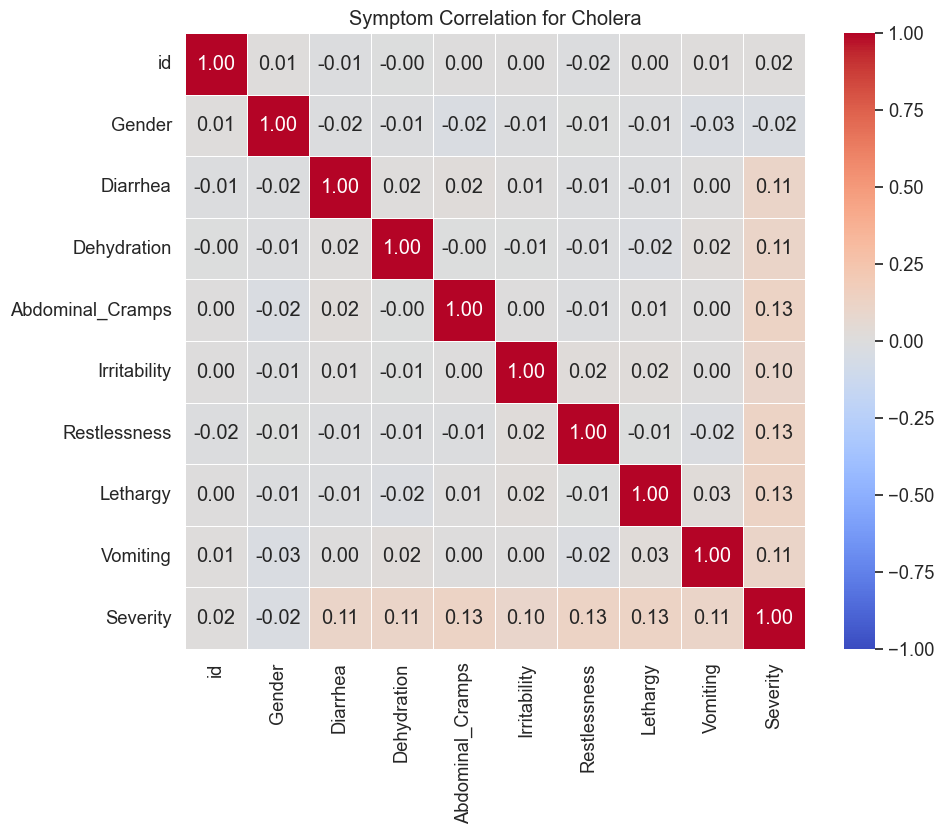

In [56]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for Cholera")

# Show the heatmap
plt.show()